# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [2]:
path = r'C:\Users\esteb\OneDrive\Desktop\2025_Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'instacart_dataset.pkl'))

# 03. Exercise Bar Chart, Histogram, Scatterplot, and subset Line Chart

### Bar Chart

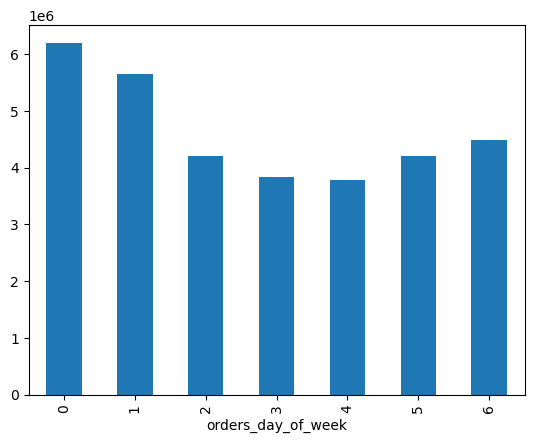

In [4]:
# Create Bar Chart based on frequency of day of the week column
bar_chart = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [5]:
# Print Frequncy of Column Sorted by Index Order
df['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

### Histogram

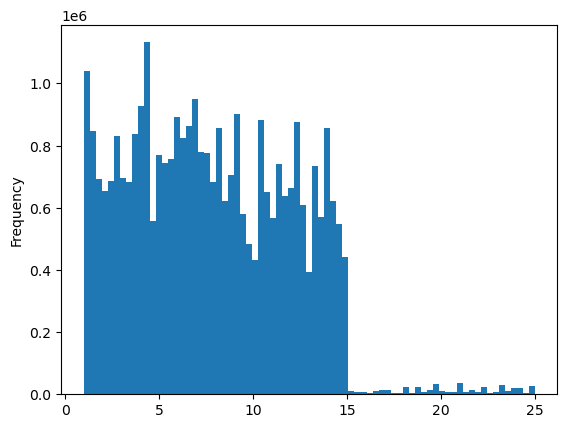

In [6]:
# Create Histogram of prices column with increased granularity
hist = df['prices'].plot.hist(bins = 75)

In [7]:
# Data integrity Check
df['prices'].describe()

count    3.240486e+07
mean     7.790885e+00
std      4.241483e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

### Scatterplot

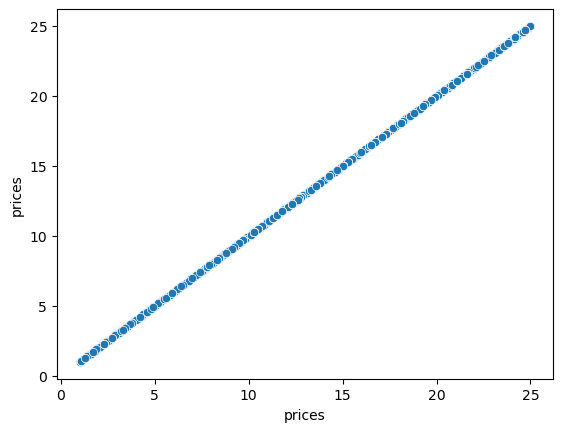

In [8]:
# Create scatterplot of prices
sctr = sns.scatterplot(x = 'prices', y = 'prices', data = df)

### Line Chart

###### Sampling Data

In [9]:
# Set the seed
np.random.seed(4)

In [10]:
#Create a list holding True/False values to the test np.random.rand() <=0.7
dev = np.random.rand(len(df)) <= 0.7

In [11]:
# View Stored boolean values
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
# Store 70% of the sample in the dataframe big
big = df[dev]

In [13]:
# Store 30% of the sample in the dataframe small
small = df[~dev]

In [14]:
# Check legth of dataframe
len(df)

32404859

In [15]:
# Check if length of small + big = df
len(small) + len(big)

32404859

In [16]:
# Create a Dataframe of the 30% of data using only specific columns
df_small_odow_prc = small[['orders_day_of_week', 'prices']]

###### Line Chart

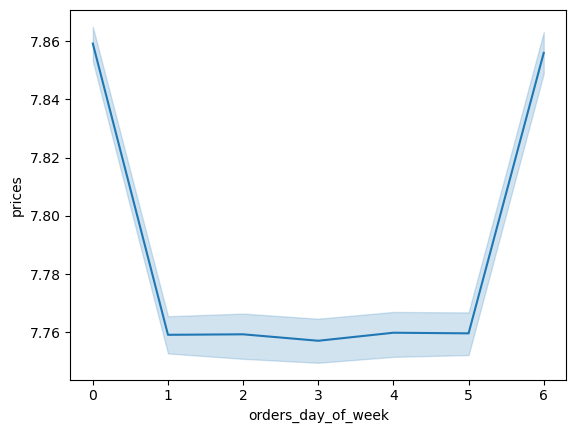

In [17]:
# Create Line Chart from subset
line = sns.lineplot(data = df_small_odow_prc, x = 'orders_day_of_week', y = 'prices')

# 04. Senior Stakeholder Histogram

In [18]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'daily_frequency',
       'new_daily_frequency', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend_item', 'spnd_itm_price_flag',
       'total_order_spend', 'order_spend_flag', 'customer_freq',
       'customer_freq_flag', 'gender', 'state', 'age', 'n_dependants',
       'fam_status', 'income', 'full_name'],
      dtype='object')

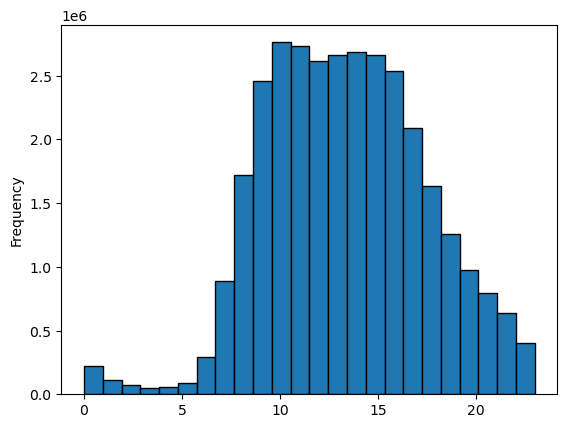

In [19]:
#Create a Histogram of the order_hour_of_day
hist_ords_hod = df['order_hour_of_day'].plot.hist(bins = 24, edgecolor = 'black')

The histogram demonstrates the hours where the orders are being placed by counting the order_hour_of_day column and separating the result. Each bar is a different hour starting from 0 to 23.

###### ChatGPT Histogram

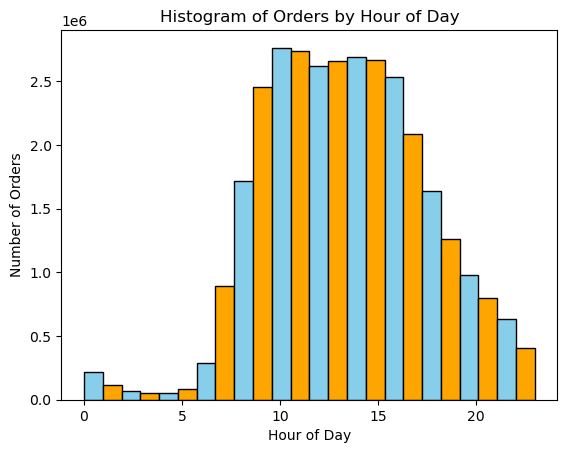

In [20]:
# Create the histogram using matplotlib directly
counts, bins, patches = plt.hist(df['order_hour_of_day'], bins=24, edgecolor='black')

# Alternate bar colors
colors = ['skyblue', 'orange']
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i % 2])

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Histogram of Orders by Hour of Day')

# Display the plot
plt.show()


I asked chatGPT to help me add color in order to be readable because it was hard to understand the solid blue histogram.

# 05. Marketing Customer Loyalty Bar Chart

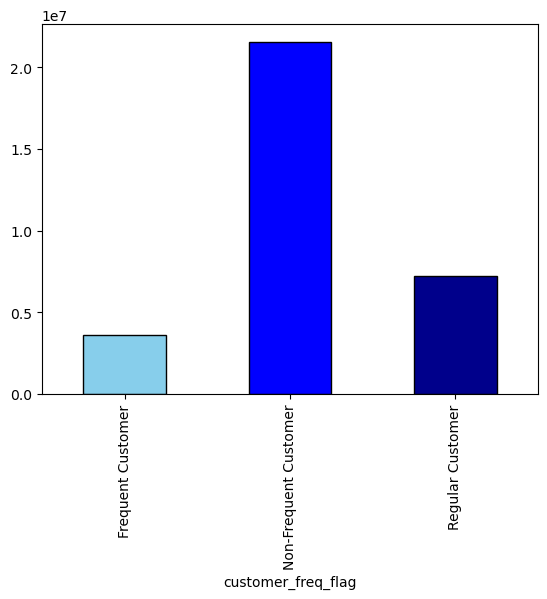

In [21]:
# Create Bar Chart based of customer loyalty
loyal_bar_chart = df['customer_freq_flag'].value_counts().sort_index().plot.bar(color = ['skyblue', 'blue', 'darkblue'],edgecolor = 'black')

# 06. Difference in Expenditure

In [22]:
# Group by hour and calculate average price from full dataset
df_avg_ohod = df.groupby('order_hour_of_day')['prices'].mean().reset_index()

In [23]:
# Check average hour of day df
df_avg_ohod.head(24)

,order_hour_of_day,prices
0,0,7.811065
1,1,7.805602
2,2,7.799060
3,3,7.827917
4,4,7.838473
5,5,7.828022
6,6,7.817696
7,7,7.819937
8,8,7.790406
9,9,7.753465


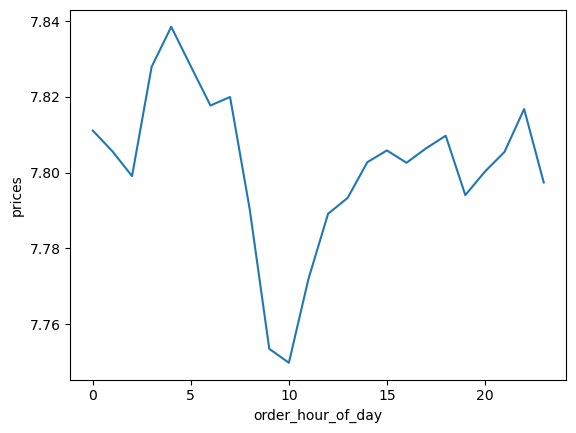

In [24]:
# Create Line Chart from subset
line_ohod_prc = sns.lineplot(data = df_avg_ohod, x = 'order_hour_of_day', y = 'prices')

# 07. Connection Between Age and Dependents

In [25]:
# Group by age and calculate average number of dependents from full dataset
df_age_avg_n_dependants = df.groupby('age')['n_dependants'].mean().reset_index()

Text(0.5, 1.0, 'Average Number of Dependants by Age')

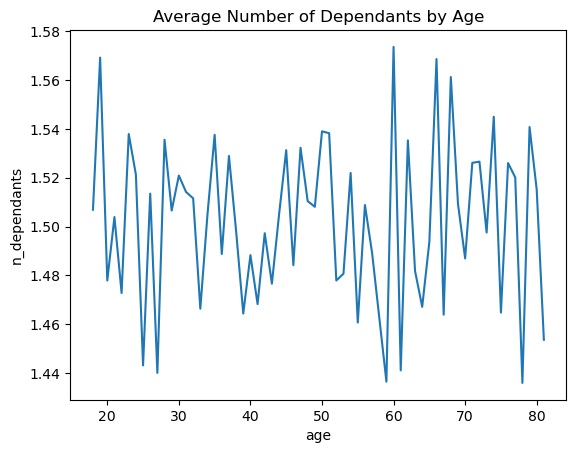

In [26]:
# Create Line Chart from subset
line_age_avg_n_dependants = sns.lineplot(data = df_age_avg_n_dependants, x = 'age', y = 'n_dependants')
plt.title('Average Number of Dependants by Age')

The line chart above displays the average number of dependants for customers at each age. While there is noticeable fluctuation across all age groups, the average generally hovers around 1.5 dependents. The is no clear upward or downward trend, suggesting that the number of dependants does not significantly vary by age in the dataset.

In [27]:
#Check Avg number of dependants
df['n_dependants'].mean()

1.5018956570679725

# 08. Relationship Between Age and Income

In [28]:
# Group by age and view thespending power
df_age_avg_income = df.groupby('age')['income'].mean().reset_index()

In [29]:
# Check the average income by age dataframe
df_age_avg_income.head(100)

,age,income
0,18,70471.861282
1,19,69774.691204
2,20,70785.248085
3,21,70566.302749
4,22,69864.954946
...,...,...
59,77,116565.185651
60,78,117107.506791
61,79,115239.011993
62,80,114279.443528


### Scatterplots

<Axes: xlabel='age', ylabel='income'>

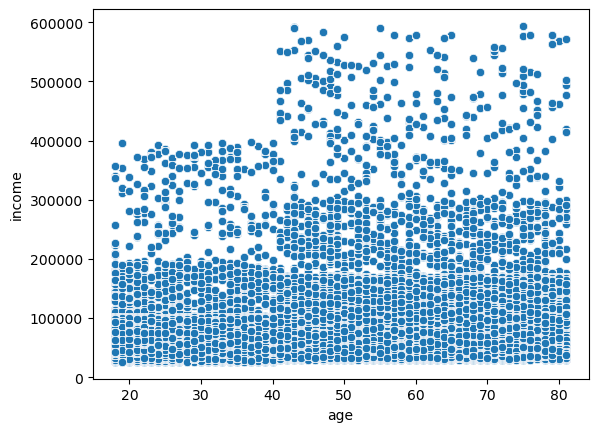

In [30]:
# Print scatterplot of income
sns.scatterplot(x = 'age', y = 'income', data = df)

The scatterplot of the entire dataframe is extremely noisy and is virtually imposible to interpret. What we can tell is that as the ages go up we see higher salaries.

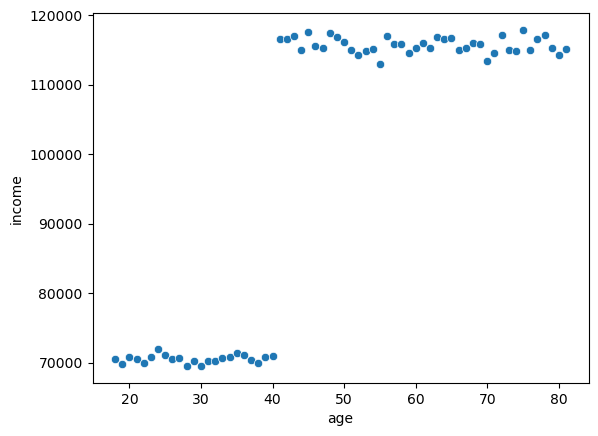

In [31]:
# Print scatterplot of avg income per age
sctr_avg_incm_age = sns.scatterplot(x = 'age', y = 'income', data = df_age_avg_income)

The second scatterplot confirms the statement of the entire dataframe in a much cleaner chart. The information displayed of the average salaries based on age highlights greatly the difference in salary between people < ~40 and > ~40. Without so much noise it makes it very easy to interpret.

# 09. Export Visualizations

In [31]:
# Export Image of Exercise scatterplot
sctr.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'sctr_prices.png'))

In [32]:
# Export Image of Exercise Line Chart Subset
line.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'line_subset_odow_prices.png'))

In [33]:
# Export Image of Histogram of orders by hour of day
hist_ords_hod.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'hist_ords_hod.png'))

In [34]:
# Export Image of Bar Chart frequency of day of the week
loyal_bar_chart.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_lyl_dow.png'))

In [35]:
# Export Image of Line Chart avg price paid based on hour of day
line_ohod_prc.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'line_avg_prices_hod.png'))

In [32]:
# Export Image of Line Chart avg number of dependants by age
line_age_avg_n_dependants.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'line_avg_ndep_age.png'))

In [33]:
# Export Image of Scatterplot of avg income per age
sctr_avg_incm_age.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'sctr_avg_incm_age.png'))